# Model Development - Used Car Pricing

#### Objectives 

   1. Develop prediction models

In this excersise let's develop several models that will predict the price of the car using the variables and features. This is just an estimate but should give us an objective idea of how much the car should cost.

Some questions we want to ask in this excersie are:

   1. Do I know if the delear is offering fair value for my trae-in?
   2. Do I know if I put a fair value on my car?

In data analytics, we often use "MODEL DEVELOPMENT" to help us predict future observations from the data we have.

A model will help us understand the exact relationship between different variables and how these variables are used to predict the result.

In [2]:
#importing libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
used_car_pricing_data = 'clean_df.csv'

In [4]:
df = pd.read_csv(used_car_pricing_data)
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,diesel,gas,std,turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,8.703704,13495.0,11.190476,Low,False,True,True,False
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,8.703704,16500.0,11.190476,Low,False,True,True,False
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,5000.0,19,9.038462,16500.0,12.368421,Medium,False,True,True,False
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,5500.0,24,7.833333,13950.0,9.791667,Low,False,True,True,False
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,5500.0,18,10.681818,17450.0,13.055556,Low,False,True,True,False


In [5]:
df['highway-mpg'] = 235/df['highway-L/100km']
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,diesel,gas,std,turbo,highway-mpg
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,21,8.703704,13495.0,11.190476,Low,False,True,True,False,27.0
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,21,8.703704,16500.0,11.190476,Low,False,True,True,False,27.0
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,19,9.038462,16500.0,12.368421,Medium,False,True,True,False,26.0
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,24,7.833333,13950.0,9.791667,Low,False,True,True,False,30.0
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,18,10.681818,17450.0,13.055556,Low,False,True,True,False,22.0


## 1. Linear Regression and Multiple Linear Regression

#### Linear Regression

One Example of a data model that we will be using is:

#### Simple Linear Regression
Simple linear regression is a method to help us understand the relationship between two variables:

  1. The predictor/independent variable (X)
  2. The response/dependent vriable (that we want to predict) (Y)

The result of Linear Regression is a "linear function" that predicts the response (dependent) variable as a function of the predictor (independent) variable.

#### Linear Function

                          "Y-hat = mX + c"
                          
    1. 'c' refers to the 'intercept' of the regression line, in other words - the value of Y when X is 0.
    2. 'm' refers to the 'slope' of the reggresion line, in other words - the value with which Y changes when X increases by unit 1.


Let's Load the modules for linear regression.

In [17]:
!pip install --upgrade scikit-learn
from sklearn.linear_model import LinearRegression

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.1 MB 3.6 MB/s eta 0:00:03
   ------- -------------------------------- 2.1/11.1 MB 4.1 MB/s eta 0:00:03
   ---------- ----------------------------- 2.9/11.1 MB 3.9 MB/s eta 0:00:03
   ------------- -------------------------- 3.7/11.1 MB 3.8 MB/s eta 0:00:02
   ---------------- ----------------------- 4.5/11.1 MB 3.7 MB/s eta 0:00:02
   ----------------- ---------------------- 5.0/11.1 MB 3.7 MB/s eta 0:00:02
   --------------------- ------------------ 6.0/11.1 MB 3.7 MB/s eta 0:00:02
   ----------------------- ---------------- 6.6/11.1 MB 3.7 MB/s eta 0:00:02
   -------------------------- ------------- 7.3/11.1 MB 3.6 MB/s eta 0:00:02
   ----------------------------- ---------- 8.1/11.1 MB 3.6 MB/s eta 0:00:01
   ---------

In [23]:
# create linear regression object
lm = LinearRegression ()
lm

LinearRegression()

### How does 'highway-mpg' help us predict car price?

for example - we can look at how 'highway-mpg', can help us predict car price. Using simple linear regression, we will create a linear function with 'highway-mpg' as the predictor variable and the 'price' as the response variable.

In [24]:
X = df[['highway-mpg']]
Y = df['price']
print(type(X))  # Should be <class 'pandas.DataFrame'>
print(type(Y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [25]:
lm.fit(X,Y)

LinearRegression()

In [26]:
#we can output a prediction
Y_hat = lm.predict(X)
Y_hat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [27]:
#value of intercept 'c'
lm.intercept_

38423.305858157386

In [29]:
#value of slope 'm'
lm.coef_

array([-821.73337832])

### What is the final estimated linear model we g0t?

As we saw above, the linear regression model structure is - "Y-hat = mX + c"

pulling in the actual values we got:

      Price = 38423.31 - 821.73 x highway-mpg

##### Now let's create the linear regression model for 'engine-sixe' as the independent varable and 'price' as the dependent variable

In [30]:
lm1 = LinearRegression()
lm1

LinearRegression()

In [31]:
X1 = df[['engine-size']]
Y1 = df['price']

In [32]:
lm1.fit(X1,Y1)

LinearRegression()

In [34]:
#intercept 
lm1.intercept_

-7963.338906281049

In [35]:
#slope
lm1.coef_

array([166.86001569])

Equation of predicted line:
     Price = 166.86 x 'engine-size' - 7963.34

#### Multiple linear regression

What if we want to predict car price using more than one variable?

if we want to include more variables to predict car price, we can use 'Multiple Linear Regression' (MLR). This is very similar to 'Simple Linear Regression' (SLR), but this method is used to explain the relationship between one continous response (dependent variable) and two or more predictor (independent variables. Most of the real world regression models involve multiple predictors. Let's analyze the structure using four predictor variables, but these results can generalize to any integer:

The equation is given by:

            Y-hat = m1X1 + m2X2 + m3X3 + m4X4 + c 
(note this is for four predictor variables, equation continous n number times for n predictor variables)  

From the previous excerise (EDA) we know that good predictors could be:

    1. Horsepower
    2. Curb-weight
    3. Engine-size
    4. Highway-mpg

let's develop a model using these variables as predictor variables.


In [36]:
z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [37]:
lm.fit(z, df['price'])

LinearRegression()

In [38]:
lm.intercept_

-15811.863767729235

In [39]:
lm.coef_

array([53.53022809,  4.70805253, 81.51280006, 36.1593925 ])

Now we got values of intercept and slope, let's write the equation with help of our standard equation -  "Y-hat = m1X1 + m2X2 + m3X3 + m4X4 + c", here c = -15811.86, m1 = 53.53, m2 = 4.708, m3 = 81.51, m4 = 36.15

Equation: "Price = 53.53 x horsepower + 4.708 x curb-weight + 81.51 x engine-size + 36.15 x highway-mpg - 15811.863"

Create and train multiple linear regression model 'lm2' where the response variable is 'price', and the predictor variable is 'normalized-losses', and 'highway-mpg'.

In [41]:
lm2 = LinearRegression ()
lm2.fit(df[['normalized-losses', 'highway-mpg']], df['price'])

LinearRegression()

In [42]:
lm2.intercept_

38201.31327245727

In [43]:
lm2.coef_

array([   1.49789586, -820.45434016])

Equation - "Price = 1.497 x normalized-losses - 820.454 x highway-mpg + 38201.313"

## Model Evaluation Using Visualization

Now that we have developed some models, how do we evaluate our models and choose the best one? One way to do this is by using a visualization.

In [44]:
#import the visualization package - seaborn
import seaborn as sns
%matplotlib inline

#### Regression Plot

When it comes to simple linear regression, an excellemnt way to visualize the fit of our model is by using regression plots.

This plot whill show a combination of a scattered daat points (a scatterplot), as well as the fitted linear regression line going through the data. This will give us a reasonable estimate of thje relationship between the two variables, the strength of the corellation, as well as the direction (positive or negative correlation).

Let's visualize highway-mpg as potential predictor variable of price:

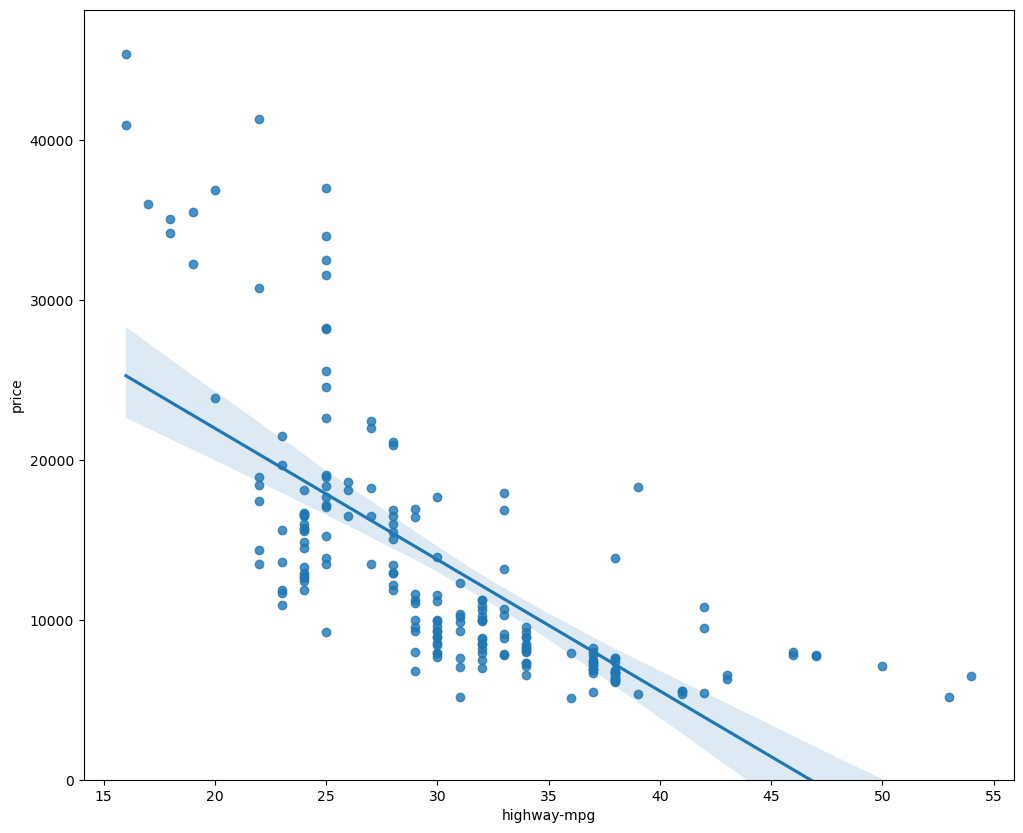

In [47]:
width = 12
height = 10
plt.figure(figsize = (width,height))
sns.regplot(x = 'highway-mpg', y = 'price', data = df)
plt.ylim(0,)
plt.show()

We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

One thing to keep in mind when looking at the regression plot is to pay attention to how scattered the data points are around the regression line. This will give us a good indication of the variance of the data and wheather a linear model would be the best fit or not? If the data is too far off from the line, this linear model might not be the best model for this data.

Let's compare this plot to the regression plot of 'peak-rpm'

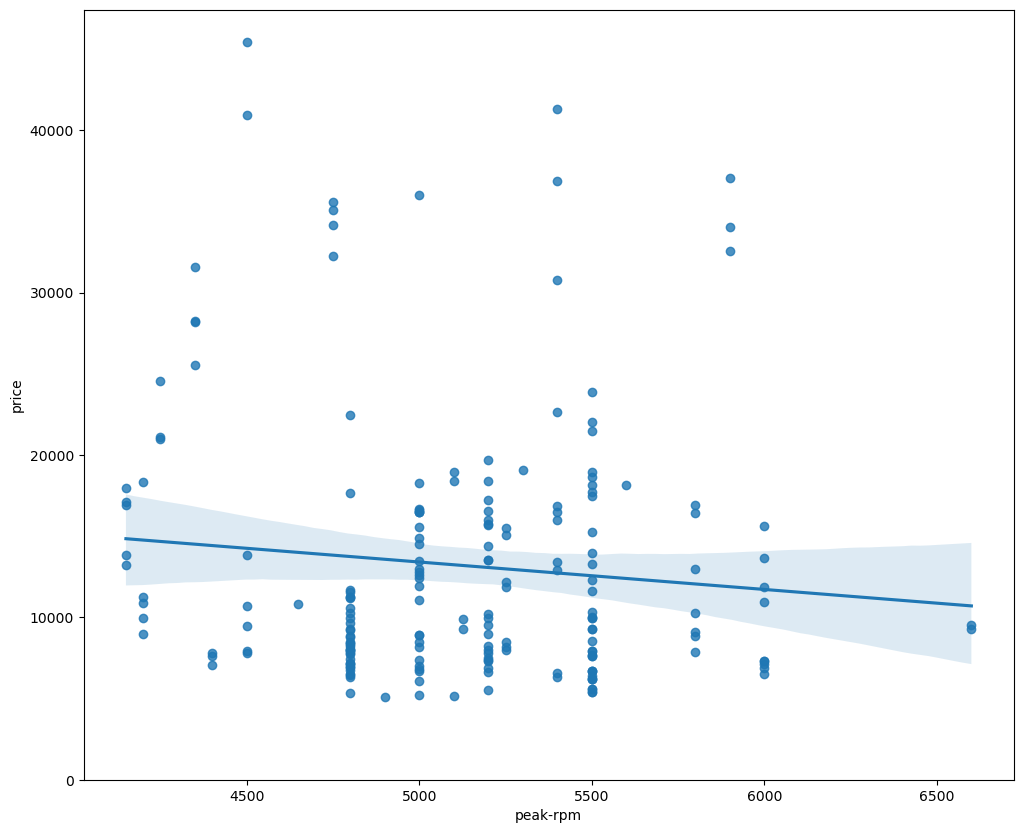

In [48]:
plt.figure(figsize = (width,height))
sns.regplot(x = 'peak-rpm', y = 'price', data = df)
plt.ylim(0,)
plt.show()

Comparing the regression plot of ;peak-rpm; and 'highway-mpg', we see that the points for 'highway-mpg' are much closer to the generated line and on average decreases, the points for 'peak=rpm' have more spread around the predicted line and it is much harder to determine if the points are deceasing or increasing as the 'peak-rpm' increases. 

Given the regression plots above, is 'peak-rpm' or 'highway-mpg' more strongly correlated with 'price'? Let;s find oiut using the method '.corr()'.

In [52]:
df[['peak-rpm', 'highway-mpg', 'price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


The variable 'highway-mpg' has a stronger correlation with 'price', it is approximately -0.704 compared to ;peak-rpm' which is approx -0.101.

#### Residual Plot

A good way to visualize the variance of the data is to use a residual plot.

What is residual?

THe difference between the observed value (y) and the predicted value (y-hat) is called the residual (e). When we look at a regression plot, the residual is the differance from the data points to the fitted regression line.

So what i a residual plot?

A residual plot is a graph that shows the residuals on the vertical y - axis and the independent variables on the x -axis.

What do we pay attention to when looking at a residual plot?

We look at the spread of the residual: If the points in a residual plot are randomly spread out around the x-aixs, then a linear model is appropriate for the data. Why so? Randomly spread out residual means that the variance is constant, and thus linear model isa  good fit for this data.

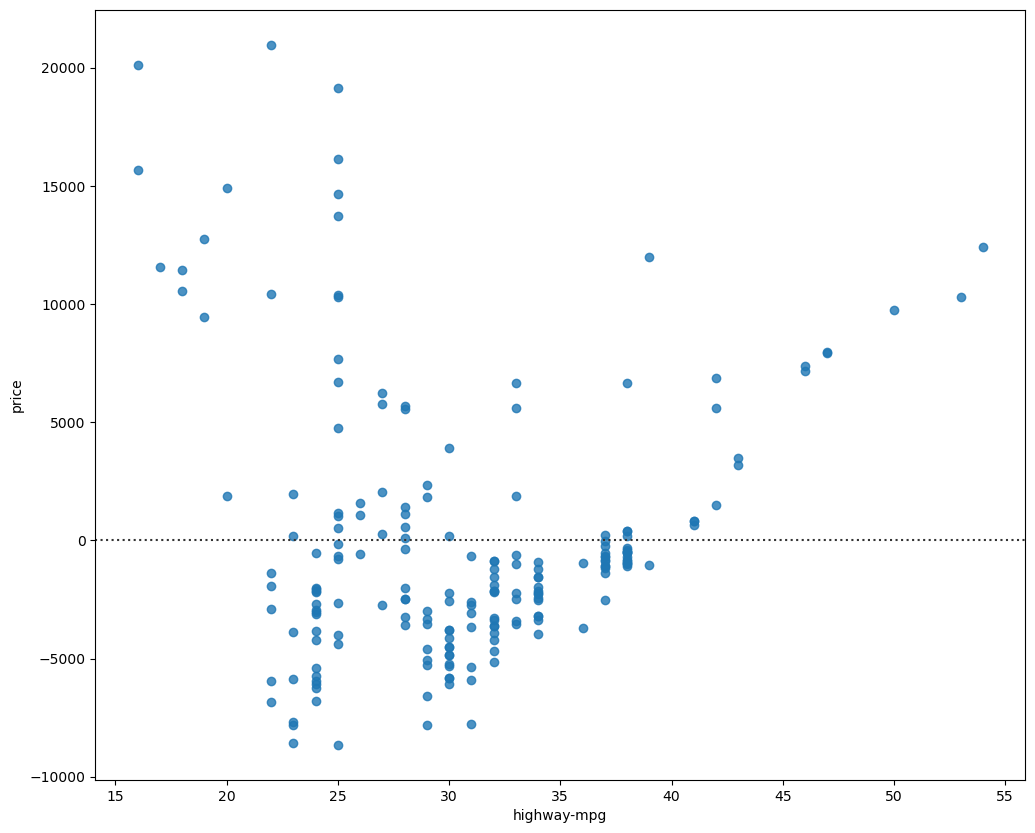

In [55]:
wigth = 12
height = 10
plt.figure(figsize = (width, height))
sns.residplot(x = df['highway-mpg'], y = df['price'])
plt.show()

What does this plot tell us?

We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.

#### Multiple Linear Regression

How do we visualize a model for Multiple Linear Regression? This get's bit complicated because we can't visualize it with regression or residual plot.

One way to look at the fit of the model is by looking at the "distribution plot". We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values. 

First, let's make a prediction:

In [56]:
Y_hat = lm.predict(z)

C:\Users\ABID\AppData\Local\Temp\ipykernel_27144\2918643430.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist = False, color = 'r', label = 'Actual Value')
C:\Users\ABID\AppData\Local\Temp\ipykernel_27144\2918643430.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


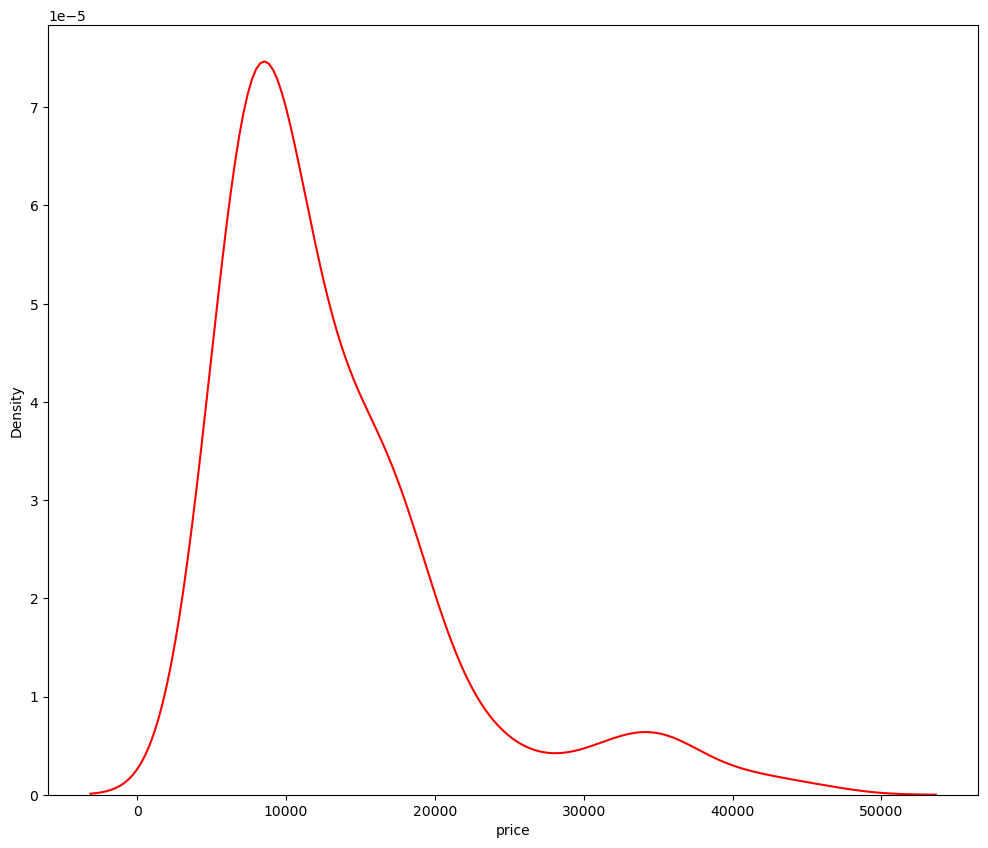

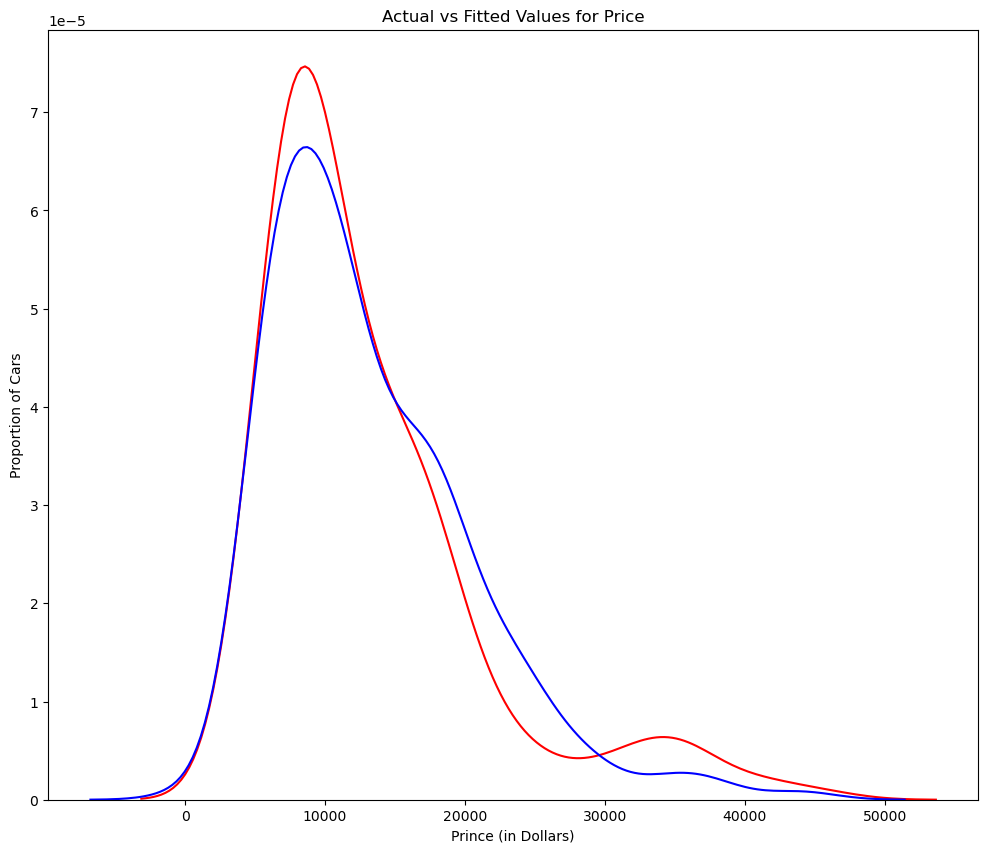

In [58]:
plt.figure(figsize = (width, height))

ax1 = sns.distplot(df['price'], hist = False, color = 'r', label = 'Actual Value')
sns.distplot(Y_hat, hist = False, color = 'b', label = 'Fitted Values', ax = ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Prince (in Dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are resonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.

## 3. Polynomial Regression and Pipelines

Polynomial Regression is a particular case of the general linear regression model or multiple linear regression models. We get non-linear relationships by squaring or setting higher-order terms of the predictor variables. 

There are different orders of polynomial regression:

                           Quadratic - 2nd Order --> Yhat = a + b1X + b2X^2
                           Cubic 3rd order ---> Yhat = a + b1X + b2X^2 + b3X^3
                           Higher order ---> Yhat = a + b1X + b2X^2 + b3X^3 + ......

wee saw earlier that a linear model did not provide the best fit while using 'highway-mpg' as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

Let's use the following function to plot the data:

In [67]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(independent_variable.min(), independent_variable.max(), 100)
    y_new = model(x_new)  # Model should be a function that takes x values and predicts y

    plt.plot(independent_variable, dependent_variable, 'o', label="Original Data")  # Scatter plot of actual data
    plt.plot(x_new, y_new, '-', label="Polynomial Fit", color='red')  # Polynomial curve

    plt.title('Polynomial Fit with Matplotlib for Price - ' + Name)
    ax = plt.gca()  # Get current axis
    ax.set_facecolor((0.898, 0.898, 0.898))  # Set background color
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')
    plt.legend()  # Show legend

    plt.show()
    plt.close()

In [68]:
#let's get thye variables
x = df['highway-mpg']
y = df['price']

Let's fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function.

In [69]:
#Here we use polynomial of the 3rd order (cubic)
f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


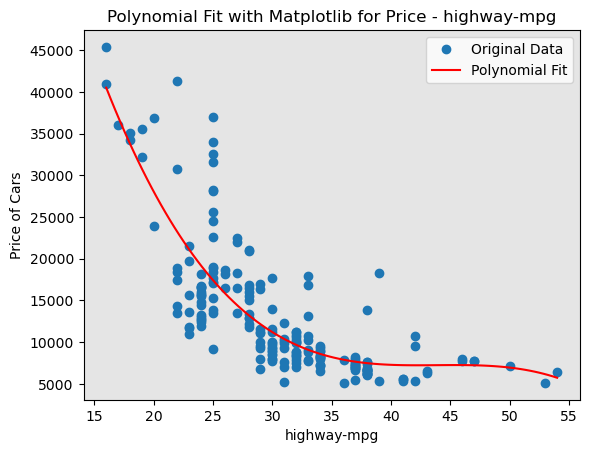

In [70]:
#Let's plot the function
PlotPolly(p,x,y,'highway-mpg')

In [64]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

We can already see from the plotting that this polynomial model performs bette than the linear model. This is because the generayted polynomial function 'hits' more of the datya points.

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


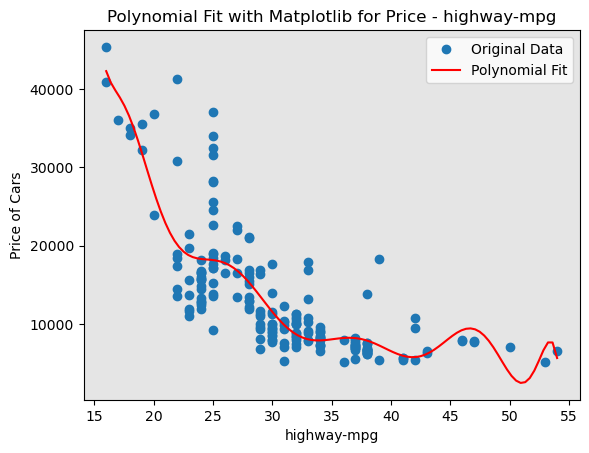

In [71]:
#create 11 order polynomial model with the variables x and y from above
f1 = np.polyfit(x,y,11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y,'highway-mpg')

The analytical eprssion for Multivariate Polynomial Function gets complicated. For exampl, the expression for a second-order (degree = 2) polynomial with two variables is given by:

                                     "Yhat = a + b1X1 + b2X2 + b3X1X2 + b4X1^2 + b5X2^2"

We can perform a polynomial transform on multiple feautures. First, we import the module:

In [73]:
from sklearn.preprocessing import PolynomialFeatures

In [75]:
#we can create PolynomialFeature object of degree 2
pr = PolynomialFeatures(degree = 2)
pr

PolynomialFeatures()

In [76]:
z_pr = pr.fit_transform(z)

In [77]:
#in the original data, there are 201 samples and 4 features
z.shape

(201, 4)

In [78]:
z_pr.shape

(201, 15)

After the transformation, there are 201 samples and 15 feautures

### Pipeline

Data pipeline simplify the steps of processing the data. We use the module 'Pipeline' to create a pipeline. We also use 'StandardScaler' as a step in our pipeline.

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline by creating a list of tuples including the name of the module or estimator and it's corresponding constructor.

In [81]:
Input = [('sacle', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias = False)), ('model', LinearRegression())]

We input the list as an argument to the pipeline constructor

In [82]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('sacle', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

First, let's convert the data type Z to type float to avoid conversion warnings that may appear as a result of standardScaler taking float inputs.

Then, we can normalize the data, perform a transform and fit the model simultaneaously.

In [83]:
z = z.astype(float)
pipe.fit(z,y)

Pipeline(steps=[('sacle', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [84]:
#similary we can normalize data, perform a transform and produce a prediction simultaneously
ypipe = pipe.predict(z)
ypipe[0:4]

array([13102.93329646, 13102.93329646, 18226.43450275, 10391.09183955])

Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the feautures 'z' and target 'y'

In [85]:
Input = [('sacle', StandardScaler()),('model',LinearRegression())]

pipe = Pipeline(Input)

pipe.fit(z,y)

ypipe = pipe.predict(z)
ypipe[0:10]

array([13699.07700462, 13699.07700462, 19052.71346719, 10620.61524404,
       15520.90025344, 13869.27463809, 15455.88834114, 15973.77411958,
       17612.7829335 , 10722.47987021])

### 4. Measures for In-Sample Evaluation

When evaluating our models, not only do we wnat to visualize the results, but we also want to quantitative measure to determine how accurate the model is.

Two vey important measures that are often used in Statistics to determine the accuracy of a model are:

      1. R^2 / R -Squared
      2. Mean Squared Error (MSE)

"R - Squared" - R-squared also known as the co-efficient of determination, is a mesaure to indicate how close the data is to the fitted regression line. The value of the R - squared is the percentage of variation of the response variable (y) that is explained by a linear model.

"Mean Squared Error (MSE)" - The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (y-hat).

#### Model - 1: Simple linear regression

In [86]:
#let's calculate the R^2 for
#highway_mpg_fit
lm.fit(X,Y)
#finf the R^2
print('The R-square is: ', lm.score(X,Y))

The R-square is:  0.4965911884339176


We can say that '49.659%' of the variation of the price is explained by this simple linear model 'horsepower-mpg'.

Let's calculate the MSE:

We can predict the outputi.e., 'y-hat' using the predict method, where X is input variable:

In [88]:
yhat = lm.predict(X)
print('The output of the first four predicted value is:', yhat[0:4])

The output of the first four predicted value is: [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [89]:
#let's import the function'mean_squared_error' from the module metrics
from sklearn.metrics import mean_squared_error

In [90]:
#now compare the predicted results with the actual results
mse = mean_squared_error(df['price'], yhat)
print('The mean square error of price and predicted value is: ',mse)

The mean square error of price and predicted value is:  31635042.944639888


#### Model 2: Multiple Linear Regression

In [91]:
#R^2
lm.fit(z, df['price'])
print('The R-square is: ', lm.score(z, df['price']))

The R-square is:  0.8093732522175299


We can say that "80.937%" of the variation of price is explained by this multiple linear regression 'multi_fit'.

Let's calculate the MSE

We produce a prediction:

In [92]:
Y_predict_multifit = lm.predict(z)

In [94]:
#we compare the predicted results with the actual results:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11979300.349818882


#### Model 3: Polynomial Fit

let's calculate R^2

Let's import the function r2_score from the module 'metrics' as we are using a different function.

In [96]:
from sklearn.metrics import r2_score

In [97]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906518


We can say that "67.419%" of the variation of price is explained by this polynomial fit.

In [98]:
#MSE
mean_squared_error(df['price'], p(x))

20474146.426361218

### 5. Prediction and Decision Making

#### Prediction

In previous section, we trained the model using the method 'fit'. Now we will use the method 'predict' to produce a prediction. Let's import 'pyplot' for plotting: we will also be using some functions from numpy.

In [99]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [100]:
#creating a new input
new_input = np.arange(1, 100, 1). reshape (-1,1)

In [101]:
#fit model
lm.fit(X,Y)
lm

LinearRegression()

In [102]:
#produce a prediction:
yhat = lm.predict(new_input)
yhat[0:5]

F:\ABID\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

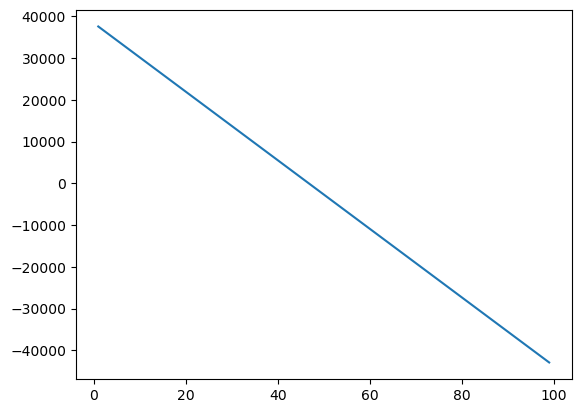

In [103]:
plt.plot(new_input, yhat)
plt.show()

## Decision Making: Determining a Good Model Fit

Now that we ahve visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

  What is a good R- squared vlaue?
  When comparing models, "the model with the highest R-squared value is a better fit" for the data.

  What is a good MSE?
  When comparing models, "the model with the smallest MSE value is a better fit" for the data.

##### Let's take a look at the valuesfor the different models.

Simple linear regression:Using Highway-mpg as a predicator Variable of Price.

    1. R-squared: 0.49659118843391759
    2. MSE: 3.16x10^7

Multiple linear regression: Using Horsepower, Crub-weight, Engine-size, and Highway-mpg as predictor variables of price.

    1. R-squared: 0.80896354913783497
    2. MSE: 1.2x10^7

Polynomial fit: Using highway-mpg as a predictor variable of price.

    1. R-squared: 0.6741946663906514
    2. MSE: 2.05x10^7

### Simple Linear Regression Model(SLR) vs Multiple Linear Regression Model (MLR)

Usually, the more variables we have, the better our model is at predicting, but this is not always true. Sometimes, we may not have enough data, we may run into numerical problems, or many of the variables may nit be useful and even act as noise. As a result we should always check the MSE and R^2. 

In order to compare the results of MLR vs Slr models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

   1. MSE: The MSE of SLR is '3.16x10^7' while MLR has an MSE of '1.2x10^7'. The MSE of MLR is much smaller.
   2. R-squared: In this case, we can see that there is big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR(0.497) is much small comapred to the R-sqaured for the MLR(0.809).

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR

### Simple Linear Model (SLR) vs Polynomial Fit

  1. MSE: We can see that the polynomial fit brought down the MSE, since this MSE is smaller than the one from the SLR.
  2. R-squared: The R-squared for the polynomial fit is larger then the R-squared for the SLR, so the polynomial fit also brought up the R- squared quite a bit.

Since the polynomial fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting 'price' with 'highway-mpg' as a predictor variable.

### Multiple Linear Regression (MLR) vs Polynomial Fit

  1. MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
  2. R- squared: The R-squared for the MLR is also much larger than for the Polynomial Fit.

## Conclusion

Comparing these three models, we conclude that "MLR model is the best model" to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that one of those variables are potential predictors of the final car price.